STEP 4: Quantum Noise & Fidelity Analysis



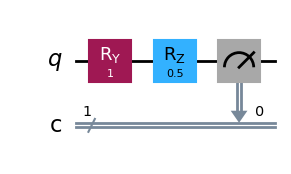

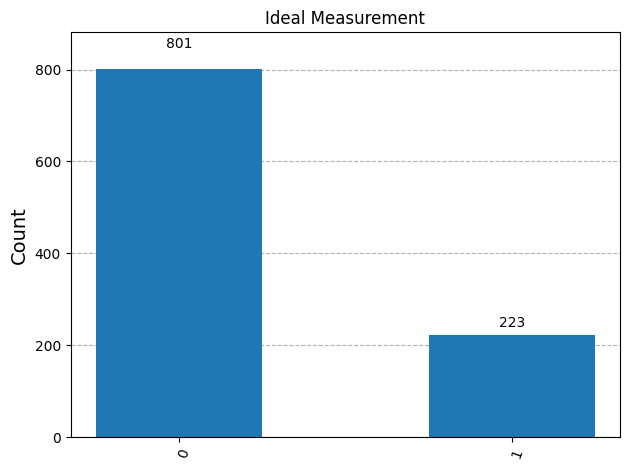

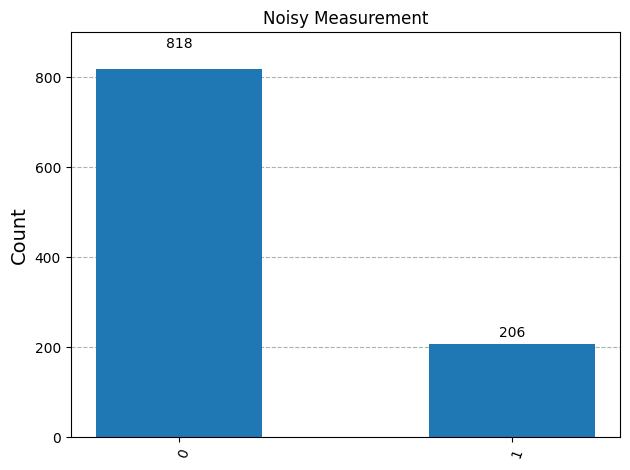


Teleportation / State Fidelity: 1.0000


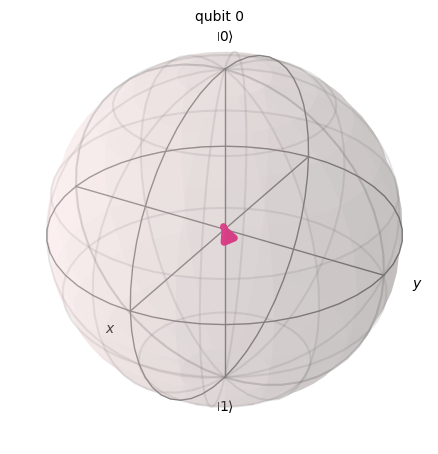

Bloch Sphere: Ideal State


In [5]:
# ==========================================================
#  Quantum Noise & Fidelity Analyzer
# ==========================================================

!pip install qiskit qiskit-aer ipywidgets matplotlib pylatexenc --quiet

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# ----------------------------------------------------------
# Noise Model
# ----------------------------------------------------------
def create_noise_model(p):
    noise = NoiseModel()
    error = depolarizing_error(p, 1)
    noise.add_all_qubit_quantum_error(error, ["x", "h", "rz", "ry"])
    return noise

# ----------------------------------------------------------
# Build Quantum Circuit
# ----------------------------------------------------------
def build_circuit(theta, phi):
    qc = QuantumCircuit(1, 1)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    qc.measure(0, 0)
    return qc

# ----------------------------------------------------------
# Main Simulation Logic
# ----------------------------------------------------------
def run_analysis(theta, phi, noise_strength, shots):
    clear_output(wait=True)

    print("STEP 4: Quantum Noise & Fidelity Analysis\n")

    # Build circuits
    qc = build_circuit(theta, phi)
    display(qc.draw("mpl"))

    # Ideal & Noisy simulators
    ideal_sim = AerSimulator()
    noisy_sim = AerSimulator(noise_model=create_noise_model(noise_strength))

    # Run simulations
    ideal_result = ideal_sim.run(qc, shots=shots).result()
    noisy_result = noisy_sim.run(qc, shots=shots).result()

    ideal_counts = ideal_result.get_counts()
    noisy_counts = noisy_result.get_counts()

    # Histograms
    display(plot_histogram(ideal_counts, title="Ideal Measurement"))
    display(plot_histogram(noisy_counts, title="Noisy Measurement"))

    # Statevectors (without measurement)
    qc_sv = QuantumCircuit(1)
    qc_sv.ry(theta, 0)
    qc_sv.rz(phi, 0)

    ideal_state = Statevector.from_instruction(qc_sv)
    noisy_state = DensityMatrix.from_instruction(qc_sv)

    # Fidelity
    fidelity = state_fidelity(ideal_state, noisy_state)

    print(f"\nTeleportation / State Fidelity: {fidelity:.4f}")

    # Bloch Sphere
    display(plot_bloch_multivector(ideal_state))
    print("Bloch Sphere: Ideal State")

# ----------------------------------------------------------
# UI / UX Controls
# ----------------------------------------------------------
theta_slider = widgets.FloatSlider(
    value=1.0, min=0, max=np.pi, step=0.1,
    description="θ (State)"
)

phi_slider = widgets.FloatSlider(
    value=0.5, min=0, max=2*np.pi, step=0.1,
    description="φ (Phase)"
)

noise_slider = widgets.FloatSlider(
    value=0.0, min=0, max=0.3, step=0.01,
    description="Noise Strength"
)

shots_slider = widgets.IntSlider(
    value=1024, min=256, max=4096, step=256,
    description="Shots"
)

run_button = widgets.Button(
    description="Run Analysis",
    button_style="success"
)

def on_run_clicked(b):
    run_analysis(
        theta_slider.value,
        phi_slider.value,
        noise_slider.value,
        shots_slider.value
    )

run_button.on_click(on_run_clicked)

# ----------------------------------------------------------
# UI Layout
# ----------------------------------------------------------
display(
    widgets.VBox([
        widgets.HTML("<h2>⚛️ Quantum Noise & Fidelity Analyzer</h2>"),
        widgets.HTML("<b>Step 1:</b> Prepare quantum state"),
        theta_slider,
        phi_slider,
        widgets.HTML("<b>Step 2:</b> Configure noise"),
        noise_slider,
        widgets.HTML("<b>Step 3:</b> Measurement settings"),
        shots_slider,
        widgets.HTML("<b>Step 4:</b> Analyze"),
        run_button
    ])
)
